#### **Pregunta:**
¿Cuándo se observan los picos más significativos en la inversión en IA por parte de las empresas, y cómo se correlacionan estos con los cambios en las tasas de empleo en diferentes industrias?

---

#### **Descripción breve de los datos:**
1. **Datos de inversión global en IA:**  
   Este conjunto de datos incluye el monto de inversión global realizado por empresas en IA en diferentes años (`Global corporate investment in AI`). Es clave para identificar las tendencias de inversión y los años con picos más destacados.

2. **Datos del impacto de la IA en el empleo:**  
   Estos datos detallan cómo la inteligencia artificial afecta diferentes puestos y sectores, incluyendo el nivel de influencia de la IA (`AI Impact`) y el uso de modelos de IA en cada puesto. Esto permitirá analizar cómo la inversión en IA afecta las dinámicas del empleo.

3. **Datos de despidos y sectores empresariales:**  
   Este conjunto contiene información sobre los despidos realizados por empresas entre 2020 y 2024, incluyendo el porcentaje de reducción de empleados (`Percentage`), la fecha de despido y el sector de la empresa. Es útil para evaluar la relación entre la inversión en IA y los cambios en el empleo.

---

#### **Desarrollo y análisis:**
1. **Análisis de tendencias:**  
   Con los datos de inversión global en IA, podemos construir una gráfica de tendencias que identifique los años con mayores picos de inversión.

2. **Relación con el mercado laboral:**  
   Utilizando los datos del impacto de la IA en el empleo, es posible observar cómo los picos de inversión afectan los sectores o puestos específicos en términos de influencia de la IA, tareas realizadas y adopción de modelos de inteligencia artificial.

3. **Relación con los despidos:**  
   Comparando los datos de despidos y las tendencias de inversión en IA, se puede analizar si los picos de inversión están correlacionados con un aumento en los despidos, y determinar cuáles industrias se ven más afectadas.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

cargar csv

In [25]:
investment_data = pd.read_csv('data/corporate-investment-in-artificial-intelligence-by-type.csv', usecols=['Entity', 'Year', 'Global corporate investment in AI'])
print("Datos de inversión en IA：")
print(investment_data.head())

jobs_data = pd.read_csv('data/IA_impact_on_jobs.csv', usecols=['Job titiles', 'AI Impact', 'Tasks', 'AI models', 'Domain'])
print("\nDatos de impacto de IA en el empleo：")
print(jobs_data.head())

layoffs_data = pd.read_csv('data/tech_layoffs_Q2_2024.csv', usecols=['Company', 'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs', 'Company_Size_after_layoffs', 'Industry'])
print("\nDatos de despidos：")
print(layoffs_data.head())


Datos de inversión en IA：
                Entity  Year  Global corporate investment in AI
0   Merger/acquisition  2013                         6885993015
1   Merger/acquisition  2014                         7657417878
2   Merger/acquisition  2015                        10117764887
3   Merger/acquisition  2016                        14733541676
4   Merger/acquisition  2017                        27282738436

Datos de impacto de IA en el empleo：
              Job titiles AI Impact  Tasks  AI models  \
0  Communications Manager       98%    365       2546   
1          Data Collector       95%    299       2148   
2              Data Entry       95%    325       2278   
3              Mail Clerk       95%    193       1366   
4      Compliance Officer       92%    194       1369   

                      Domain  
0         Communication & PR  
1                  Data & IT  
2  Administrative & Clerical  
3      Leadership & Strategy  
4       Medical & Healthcare  

Datos de despidos：
   

Preprocesamiento de datos, conversión de type

In [26]:
# Limpieza de los datos de inversión en IA
investment_data['Global corporate investment in AI'] = investment_data['Global corporate investment in AI'] / 1e9  # Convertir a miles de millones
investment_data = investment_data.sort_values('Year')  # Ordenar por año
print("\nDatos de inversión en IA después de la limpieza:")
print(investment_data.head())

# Limpieza de los datos de impacto de IA en el empleo
# Aseguramos que 'AI Impact' es de tipo string antes de aplicar .str
if jobs_data['AI Impact'].dtype != 'object':
    jobs_data['AI Impact'] = jobs_data['AI Impact'].astype(str)

# Convertir porcentaje a decimal
jobs_data['AI Impact'] = jobs_data['AI Impact'].str.rstrip('%').astype(float) / 100
print("\nDatos de impacto de IA en el empleo después de la limpieza:")
print(jobs_data.head())

# Limpieza de los datos de despidos
# Aseguramos que 'Percentage' es de tipo string antes de aplicar .str
if layoffs_data['Percentage'].dtype != 'object':
    layoffs_data['Percentage'] = layoffs_data['Percentage'].astype(str)

# Convertir valores de porcentaje a flotantes
layoffs_data['Percentage'] = layoffs_data['Percentage'].str.replace(',', '.').astype(float)

# Convertir a formato de fecha y extraer el año
layoffs_data['Date_layoffs'] = pd.to_datetime(layoffs_data['Date_layoffs'], errors='coerce')  # Convertir a formato de fecha
layoffs_data['Year'] = layoffs_data['Date_layoffs'].dt.year  # Extraer el año
print("\nDatos de despidos después de la limpieza:")
print(layoffs_data.head())



Datos de inversión en IA después de la limpieza:
                 Entity  Year  Global corporate investment in AI
0    Merger/acquisition  2013                           6.885993
22   Private investment  2013                           6.013612
33      Public offering  2013                           1.802920
44                Total  2013                          16.947452
11       Minority stake  2013                           2.244927

Datos de impacto de IA en el empleo después de la limpieza:
              Job titiles  AI Impact  Tasks  AI models  \
0  Communications Manager       0.98    365       2546   
1          Data Collector       0.95    299       2148   
2              Data Entry       0.95    325       2278   
3              Mail Clerk       0.95    193       1366   
4      Compliance Officer       0.92    194       1369   

                      Domain  
0         Communication & PR  
1                  Data & IT  
2  Administrative & Clerical  
3      Leadership & Strate

verificar los datos

In [27]:
# Verificar valores nulos en los datos de inversión en IA
print("\nValores nulos en los datos de inversión en IA:")
print(investment_data.isnull().sum())

# Verificar valores nulos en los datos de impacto de IA en el empleo
print("\nValores nulos en los datos de impacto de IA en el empleo:")
print(jobs_data.isnull().sum())

# Verificar valores nulos en los datos de despidos
print("\nValores nulos en los datos de despidos:")
print(layoffs_data.isnull().sum())

# Revisar tipos de datos para asegurarnos de que las columnas sean del tipo correcto
print("\nTipos de datos en los datos de inversión en IA:")
print(investment_data.dtypes)

print("\nTipos de datos en los datos de impacto de IA en el empleo:")
print(jobs_data.dtypes)

print("\nTipos de datos en los datos de despidos:")
print(layoffs_data.dtypes)



Valores nulos en los datos de inversión en IA:
Entity                               0
Year                                 0
Global corporate investment in AI    0
dtype: int64

Valores nulos en los datos de impacto de IA en el empleo:
Job titiles    0
AI Impact      0
Tasks          0
AI models      0
Domain         0
dtype: int64

Valores nulos en los datos de despidos:
Company                          0
Date_layoffs                     0
Percentage                     172
Company_Size_before_Layoffs    254
Company_Size_after_layoffs     220
Industry                         0
Year                             0
dtype: int64

Tipos de datos en los datos de inversión en IA:
Entity                                object
Year                                   int64
Global corporate investment in AI    float64
dtype: object

Tipos de datos en los datos de impacto de IA en el empleo:
Job titiles     object
AI Impact      float64
Tasks            int64
AI models        int64
Domain          

limpieza

In [28]:
# Paso 1: Asegurarse de que la columna sea de tipo string para manejar anomalías
layoffs_data['Company_Size_before_Layoffs'] = layoffs_data['Company_Size_before_Layoffs'].astype(str)
layoffs_data['Company_Size_after_layoffs'] = layoffs_data['Company_Size_after_layoffs'].astype(str)

# Paso 2: Eliminar espacios en blanco y caracteres no numéricos
layoffs_data['Company_Size_before_Layoffs'] = layoffs_data['Company_Size_before_Layoffs'].str.replace(r'\D', '', regex=True)
layoffs_data['Company_Size_after_layoffs'] = layoffs_data['Company_Size_after_layoffs'].str.replace(r'\D', '', regex=True)

# Paso 3: Convertir a valores numéricos
layoffs_data['Company_Size_before_Layoffs'] = pd.to_numeric(layoffs_data['Company_Size_before_Layoffs'], errors='coerce')
layoffs_data['Company_Size_after_layoffs'] = pd.to_numeric(layoffs_data['Company_Size_after_layoffs'], errors='coerce')

# Paso 4: Rellenar los valores nulos con la mediana
layoffs_data['Company_Size_before_Layoffs'] = layoffs_data['Company_Size_before_Layoffs'].fillna(
    layoffs_data['Company_Size_before_Layoffs'].median()
)
layoffs_data['Company_Size_after_layoffs'] = layoffs_data['Company_Size_after_layoffs'].fillna(
    layoffs_data['Company_Size_after_layoffs'].median()
)

# Verificar nuevamente los valores nulos y tipos de datos
print("\nValores nulos después de la limpieza adicional (versión corregida):")
print(layoffs_data.isnull().sum())

print("\nTipos de datos después de la limpieza adicional (versión corregida):")
print(layoffs_data.dtypes)



Valores nulos después de la limpieza adicional (versión corregida):
Company                          0
Date_layoffs                     0
Percentage                     172
Company_Size_before_Layoffs      0
Company_Size_after_layoffs       0
Industry                         0
Year                             0
dtype: int64

Tipos de datos después de la limpieza adicional (versión corregida):
Company                                object
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs           float64
Company_Size_after_layoffs            float64
Industry                               object
Year                                    int32
dtype: object


Análisis de tendencias de inversión en IA

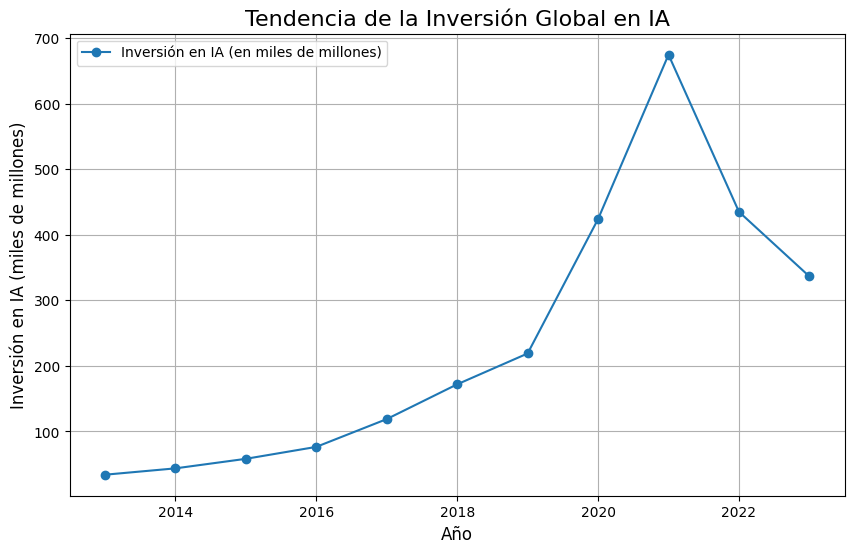

Año con la inversión máxima en IA: 2021 (674.80 miles de millones)


In [29]:
# Agrupar los datos de inversión por año y calcular la suma total
investment_trend = investment_data.groupby('Year')['Global corporate investment in AI'].sum()

# Dibujar la gráfica de tendencias
plt.figure(figsize=(10, 6))
plt.plot(investment_trend.index, investment_trend.values, marker='o', linestyle='-', label='Inversión en IA (en miles de millones)')
plt.title('Tendencia de la Inversión Global en IA', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Inversión en IA (miles de millones)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Identificar los años con inversión máxima
peak_year = investment_trend.idxmax()
peak_investment = investment_trend.max()
print(f"Año con la inversión máxima en IA: {peak_year} ({peak_investment:.2f} miles de millones)")

Análisis de impacto en el empleo


Top 5 dominios más afectados por IA:
Domain
Communication & PR           0.303885
Data & IT                    0.303546
Administrative & Clerical    0.303397
Leadership & Strategy        0.303248
Law Enforcement              0.303085
Name: AI Impact, dtype: float64


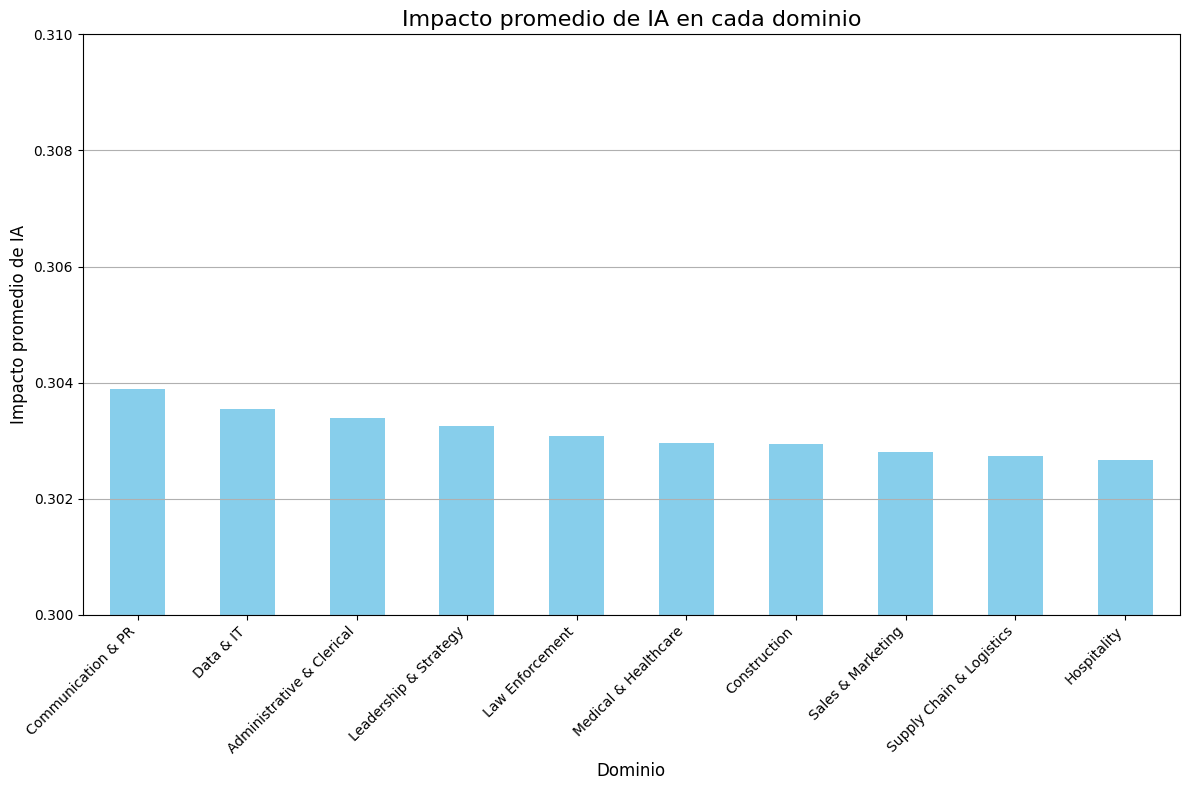


Top 5 trabajos más afectados por IA:
              Job titiles  AI Impact  Tasks  AI models
0  Communications Manager       0.98    365       2546
2              Data Entry       0.95    325       2278
3              Mail Clerk       0.95    193       1366
1          Data Collector       0.95    299       2148
4      Compliance Officer       0.92    194       1369


In [30]:
# Agrupar por 'Domain' y calcular el impacto promedio de IA en cada dominio
domain_impact = jobs_data.groupby('Domain')['AI Impact'].mean().sort_values(ascending=False)

# Mostrar los 5 dominios más afectados
print("\nTop 5 dominios más afectados por IA:")
print(domain_impact.head(5))

# Visualizar el impacto promedio por dominio con rango ajustado en el eje Y
plt.figure(figsize=(12, 8))
domain_impact.plot(kind='bar', color='skyblue')
plt.title('Impacto promedio de IA en cada dominio', fontsize=16)
plt.xlabel('Dominio', fontsize=12)
plt.ylabel('Impacto promedio de IA', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.3, 0.31)  # Ajustar el rango del eje Y
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Identificar los 5 trabajos más afectados por IA
top_jobs = jobs_data.sort_values('AI Impact', ascending=False).head(5)

print("\nTop 5 trabajos más afectados por IA:")
print(top_jobs[['Job titiles', 'AI Impact', 'Tasks', 'AI models']])


Análisis de tendencias de despidos (2 plots)

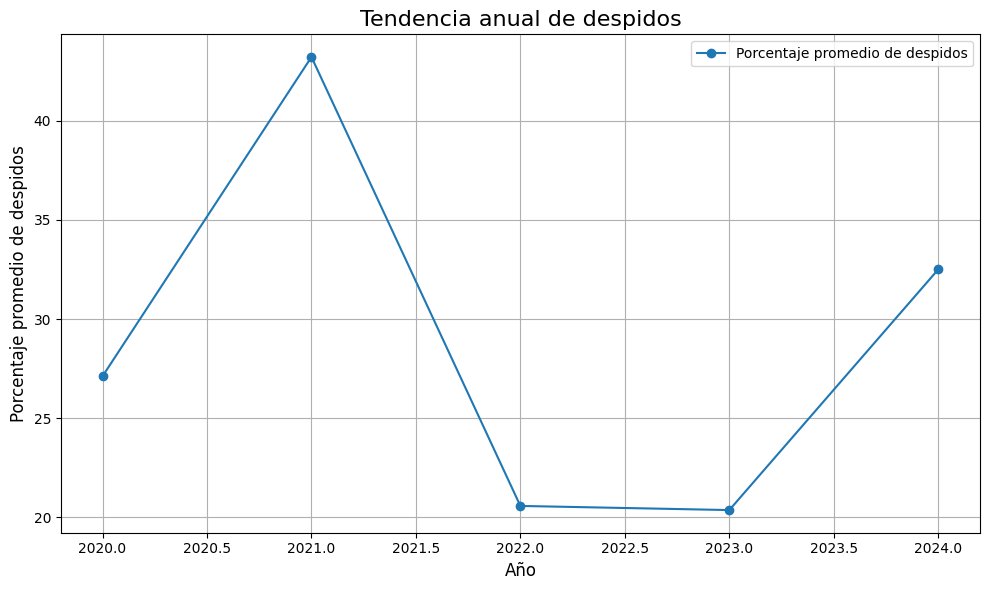


Año con mayor porcentaje promedio de despidos: 2021

Top 5 industrias con mayor porcentaje promedio de despidos:
Industry
Environmental Services    100.000000
Social posting site       100.000000
Insurance                  92.333333
Gaming                     48.000000
Aerospace                  36.666667
Name: Percentage, dtype: float64

Top 5 industrias con mayor porcentaje promedio de despidos (después de eliminar 100%):
Industry
Insurance                 77.00
cloud                     30.00
Fintech                   29.50
Aerospace                 28.75
Biotechnology Research    25.00
Name: Percentage, dtype: float64


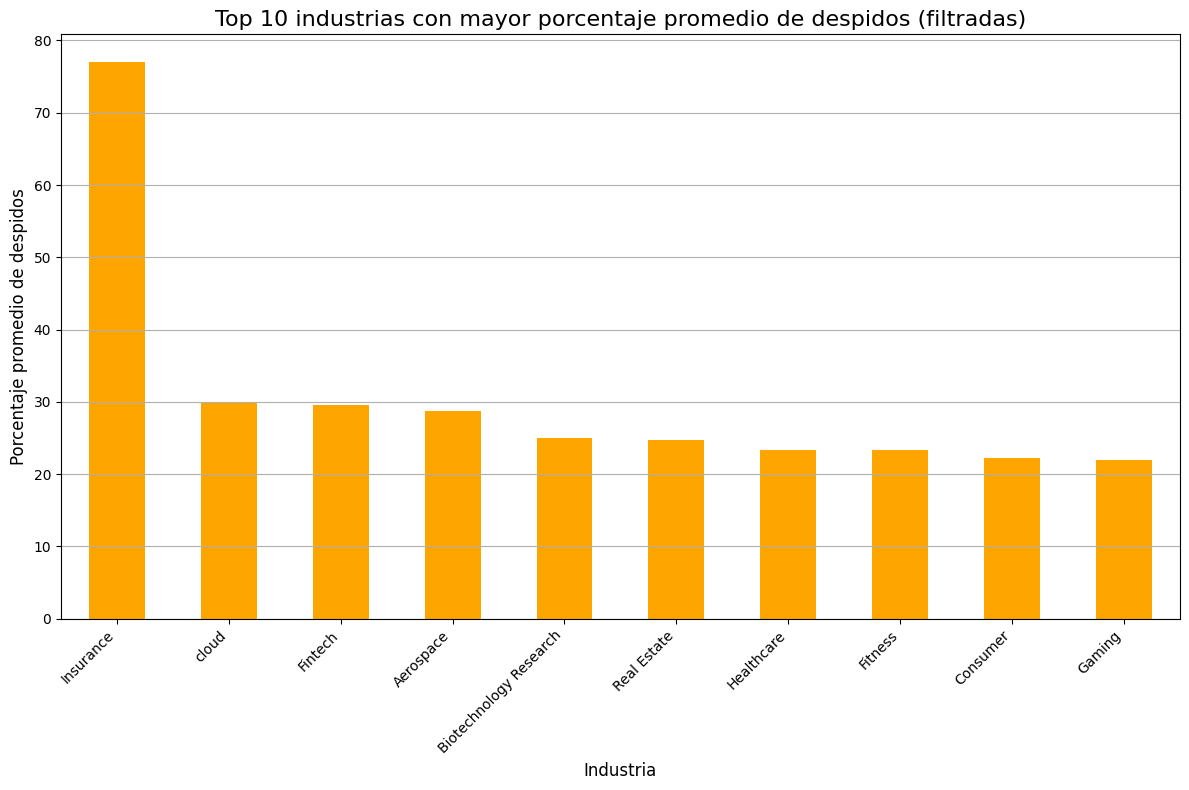

In [31]:
# Agrupar por año y calcular el promedio y total de despidos
yearly_layoffs = layoffs_data.groupby('Year').agg(
    average_percentage=('Percentage', 'mean'),
    total_laid_off=('Company_Size_before_Layoffs', 'sum')
).sort_index()

# Visualizar tendencia anual de despidos
plt.figure(figsize=(10, 6))
plt.plot(yearly_layoffs.index, yearly_layoffs['average_percentage'], marker='o', label='Porcentaje promedio de despidos')
plt.title('Tendencia anual de despidos', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje promedio de despidos', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Identificar el año con mayor porcentaje promedio de despidos
peak_layoff_year = yearly_layoffs['average_percentage'].idxmax()
print(f"\nAño con mayor porcentaje promedio de despidos: {peak_layoff_year}")

# Agrupar por industria y calcular el promedio de despidos
industry_layoffs = layoffs_data.groupby('Industry')['Percentage'].mean().sort_values(ascending=False)

# Mostrar las 5 industrias con mayor porcentaje promedio de despidos
print("\nTop 5 industrias con mayor porcentaje promedio de despidos:")
print(industry_layoffs.head(5))

# Visualizar impacto por industria
# Filtrar industrias con porcentaje de despidos menor al 100%
filtered_layoffs_data = layoffs_data[layoffs_data['Percentage'] < 100]

# Recalcular el promedio de despidos por industria
industry_layoffs_filtered = filtered_layoffs_data.groupby('Industry')['Percentage'].mean().sort_values(ascending=False)

# Mostrar las 5 industrias principales después del filtro
print("\nTop 5 industrias con mayor porcentaje promedio de despidos (después de eliminar 100%):")
print(industry_layoffs_filtered.head(5))

# Visualizar impacto por industria después del filtro
plt.figure(figsize=(12, 8))
industry_layoffs_filtered.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 industrias con mayor porcentaje promedio de despidos (filtradas)', fontsize=16)
plt.xlabel('Industria', fontsize=12)
plt.ylabel('Porcentaje promedio de despidos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



visualizacion final


El año con la inversión máxima en IA fue: 2021

En el año 2021, el porcentaje promedio de despidos (filtrado) fue: 27.73%

Top 5 trabajos más afectados por IA (en general):
              Job titiles  AI Impact  Tasks  AI models
0  Communications Manager       0.98    365       2546
2              Data Entry       0.95    325       2278
3              Mail Clerk       0.95    193       1366
1          Data Collector       0.95    299       2148
4      Compliance Officer       0.92    194       1369

Top 5 industrias con mayores despidos en el año pico de inversión (filtradas):
Industry
Education         70.0
Transportation    40.0
Data              27.0
Real Estate       17.0
Other             15.0
Name: Percentage, dtype: float64


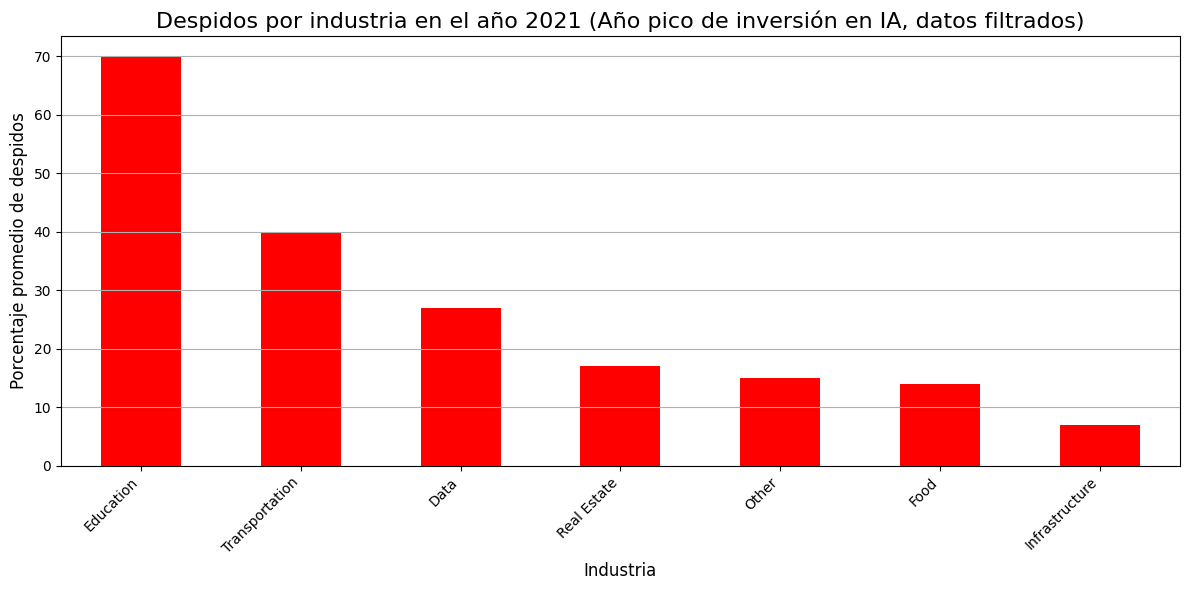

In [32]:
# 1. Obtener el año con inversión máxima en IA
investment_peak_year = investment_trend.idxmax()
print(f"\nEl año con la inversión máxima en IA fue: {investment_peak_year}")

# 2. Filtrar datos de despidos para el año de inversión máxima
# Usamos el dataset filtrado sin industrias con 100% de despidos
layoffs_peak_year_filtered = filtered_layoffs_data[filtered_layoffs_data['Year'] == investment_peak_year]

# Calcular el promedio de porcentaje de despidos en el año pico (datos filtrados)
average_layoffs_peak_filtered = layoffs_peak_year_filtered['Percentage'].mean()
print(f"\nEn el año {investment_peak_year}, el porcentaje promedio de despidos (filtrado) fue: {average_layoffs_peak_filtered:.2f}%")

# 3. Analizar el impacto de IA en los trabajos durante el año pico de inversión
# Obtener los trabajos más afectados en todos los años
most_affected_jobs = jobs_data.sort_values('AI Impact', ascending=False).head(5)
print("\nTop 5 trabajos más afectados por IA (en general):")
print(most_affected_jobs[['Job titiles', 'AI Impact', 'Tasks', 'AI models']])

# 4. Relación entre inversión y despidos por industria en el año pico
industry_layoffs_peak_filtered = layoffs_peak_year_filtered.groupby('Industry')['Percentage'].mean().sort_values(ascending=False)
print("\nTop 5 industrias con mayores despidos en el año pico de inversión (filtradas):")
print(industry_layoffs_peak_filtered.head(5))

# Visualización: Relación de despidos e inversión en el año pico (datos filtrados)
plt.figure(figsize=(12, 6))
industry_layoffs_peak_filtered.head(10).plot(kind='bar', color='red')
plt.title(f'Despidos por industria en el año {investment_peak_year} (Año pico de inversión en IA, datos filtrados)', fontsize=16)
plt.xlabel('Industria', fontsize=12)
plt.ylabel('Porcentaje promedio de despidos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **Resumen del impacto de la inversión en IA en el empleo**

#### **Uso de los tres conjuntos de datos**
Los tres conjuntos de datos proporcionan una perspectiva integral sobre cómo la inversión en inteligencia artificial (IA) afecta el mercado laboral:
- **Inversión en IA**: Identifica el año pico de inversión en IA (2021) y lo utiliza como referencia para analizar su impacto.
- **Impacto de la IA en los empleos**: Analiza qué puestos de trabajo son los más afectados por la IA y en qué medida.
- **Despidos por industria**: Explora cómo diferentes industrias se vieron afectadas en términos de despidos durante el año pico de inversión en IA.

---

#### **1. Año pico de la inversión en IA**
- **Año**: 2021 fue el año con el mayor nivel de inversión global en IA.
- **Relación con despidos**:
  - En 2021, el porcentaje promedio de despidos (tras filtrar valores extremos) fue del **27.73%**, reflejando un impacto significativo, aunque menor al observado previamente.
  - **Sectores como educación y transporte** destacaron con altos porcentajes de despidos, mostrando la presión de modernización tecnológica en estas áreas.

---

#### **2. Impacto de la IA en los puestos de trabajo**
- **Puestos más afectados por la IA**:
  - **Gerente de Comunicaciones (Communications Manager)** fue el puesto más afectado, con un impacto de IA del **98%**.
  - Otros puestos significativamente afectados incluyen **Entrada de Datos (Data Entry)**, **Recolector de Datos (Data Collector)** y **Auxiliar de Correo (Mail Clerk)**, todos con un impacto superior al **95%**.
- **Características principales**:
  - Los trabajos con alto impacto de IA suelen implicar **tareas repetitivas** o **procesos fácilmente automatizables**, haciéndolos más susceptibles de ser reemplazados por tecnologías basadas en IA.
  - Ejemplos como la entrada y recolección de datos reflejan este patrón, indicando la necesidad de reentrenar a los trabajadores para roles más avanzados.

---

#### **3. Distribución de despidos por industria**
- **Industrias con más despidos**:
  - **Educación** lideró con un porcentaje promedio de despidos del **70%**, reflejando una significativa reestructuración tecnológica en el sector.
  - **Transporte** tuvo un porcentaje de despidos del **40%**, indicando una transición gradual hacia la automatización.
  - Otros sectores como **Data (27%)**, **Bienes Raíces (Real Estate, 17%)** y **Otros (15%)** también mostraron impactos significativos.
- **Análisis adicional**:
  - Sectores como la educación pueden estar ajustándose a nuevas tecnologías y metodologías de trabajo, mientras que el transporte experimenta una modernización en sus procesos logísticos.

---

#### **4. Relación entre la inversión en IA y los despidos por industria**
- El crecimiento de la inversión en IA (especialmente en 2021) impulsó la **modernización tecnológica** y, en algunos casos, resultó en **ajustes significativos de recursos humanos**:
  - **Educación** y **Transporte** experimentaron un impacto significativo, posiblemente debido a la adopción de tecnologías automatizadas en roles administrativos y operativos.
  - Otros sectores como **Data** mostraron un impacto más leve pero aún notable, relacionado con la transición hacia procesos más automatizados y basados en datos.

---

### **Conclusión**
El pico de inversión en IA en 2021 marcó un punto de inflexión en varios sectores, con un impacto significativo en la reestructuración laboral y los patrones de despidos. Aunque algunos sectores como la educación y el transporte enfrentaron mayores desafíos, esta tendencia resalta la necesidad de políticas y estrategias enfocadas en:
1. **Reentrenamiento laboral** para roles menos susceptibles a la automatización.
2. **Apoyo a sectores con alta densidad de mano de obra** para integrar tecnologías sin desplazar de manera masiva a los trabajadores.
3. **Adopción estratégica de IA** para maximizar sus beneficios mientras se minimizan los impactos negativos en el empleo.


### **Pregunta:**
¿Dónde (en qué regiones o países) se está produciendo la adopción más rápida de la IA en el ámbito laboral, considerando también el tamaño de las empresas, y cómo esto está afectando las disparidades económicas y de empleo entre diferentes áreas geográficas?

---

#### **Descripción breve de los datos:**

1. **Datos de impacto de la IA en el empleo:**  
   Incluye información sobre cómo la IA está transformando diferentes sectores laborales, indicando el porcentaje de impacto (`AI Impact`) y los modelos de IA adoptados en cada puesto. Esto permite evaluar la influencia de la IA en el empleo en diferentes regiones.

2. **Datos de patentes de IA por industria:**  
   Proporciona el número de patentes relacionadas con la inteligencia artificial en diferentes países y sectores industriales (`Patent applications granted`), lo cual es útil para analizar la adopción tecnológica en áreas específicas y su correlación con el desarrollo económico regional.

---

#### **Desarrollo y análisis:**

1. **Análisis sectorial:**  
   Usando los datos de patentes de IA, se pueden identificar las industrias con mayor desarrollo tecnológico y comparar la distribución de estas innovaciones entre países. Esto permite entender qué sectores están adoptando IA de forma más rápida.

2. **Impacto en el empleo:**  
   A partir de los datos de impacto de la IA en el empleo, se analiza cómo las áreas con mayor inversión o desarrollo tecnológico están afectando los niveles de empleo y las habilidades requeridas en diferentes sectores.

3. **Desigualdades económicas y de empleo:**  
   Comparando los tres conjuntos de datos, se evalúa si la adopción de IA está generando disparidades económicas o laborales entre diferentes regiones, identificando posibles brechas tecnológicas o de habilidades.


verificar

In [33]:
# Leer los datos de patentes
patent_data = pd.read_csv('data/artificial-intelligence-granted-patents-by-industry.csv')

# Verificar valores nulos
print("Valores nulos por columna:")
print(patent_data.isnull().sum())

# Revisión de tipos de datos
print("\nTipos de datos originales:")
print(patent_data.dtypes)

# Asegurar que las columnas de patentes sean de tipo numérico
patent_columns = [col for col in patent_data.columns if 'Patent applications granted' in col]
for col in patent_columns:
    patent_data[col] = pd.to_numeric(patent_data[col], errors='coerce')

# Llenar valores nulos en columnas de patentes con 0 (asumiendo que significa sin patentes)
patent_data[patent_columns] = patent_data[patent_columns].fillna(0)

# Asegurar que 'Year' sea de tipo numérico
patent_data['Year'] = pd.to_numeric(patent_data['Year'], errors='coerce')

# Crear una nueva columna para el total de patentes por fila
patent_data['Total Patents'] = patent_data[patent_columns].sum(axis=1)

# Verificar posibles valores extremos (patentes negativas o valores absurdamente altos)
print("\nEstadísticas descriptivas del total de patentes:")
print(patent_data['Total Patents'].describe())

# Filtrar filas con valores inválidos (por ejemplo, años faltantes o patentes negativas)
patent_data = patent_data[(patent_data['Year'].notnull()) & (patent_data['Total Patents'] >= 0)]

# Mostrar una vista previa de los datos limpios
print("\nVista previa de los datos limpios:")
print(patent_data.head())

# Agrupar por país y año para calcular el total de patentes
patent_summary = patent_data.groupby(['Entity', 'Year'])['Total Patents'].sum().reset_index()

# Mostrar el resumen del total de patentes agrupado por país y año
print("\nResumen del total de patentes por país y año:")
print(patent_summary.head())


Valores nulos por columna:
Entity                                                                    0
Code                                                                      0
Year                                                                      0
Patent applications granted - Field: Banking and finance                  0
Patent applications granted - Field: Industry and manufacturing           0
Patent applications granted - Field: Energy management                    0
Patent applications granted - Field: Physical sciences and engineering    0
Patent applications granted - Field: Security                             0
Patent applications granted - Field: Life sciences                        0
Patent applications granted - Field: Transportation                       0
Patent applications granted - Field: Business                             0
Patent applications granted - Field: Telecommunications                   0
Patent applications granted - Field: Personal devices and com

Análisis de tendencias y distribución regional

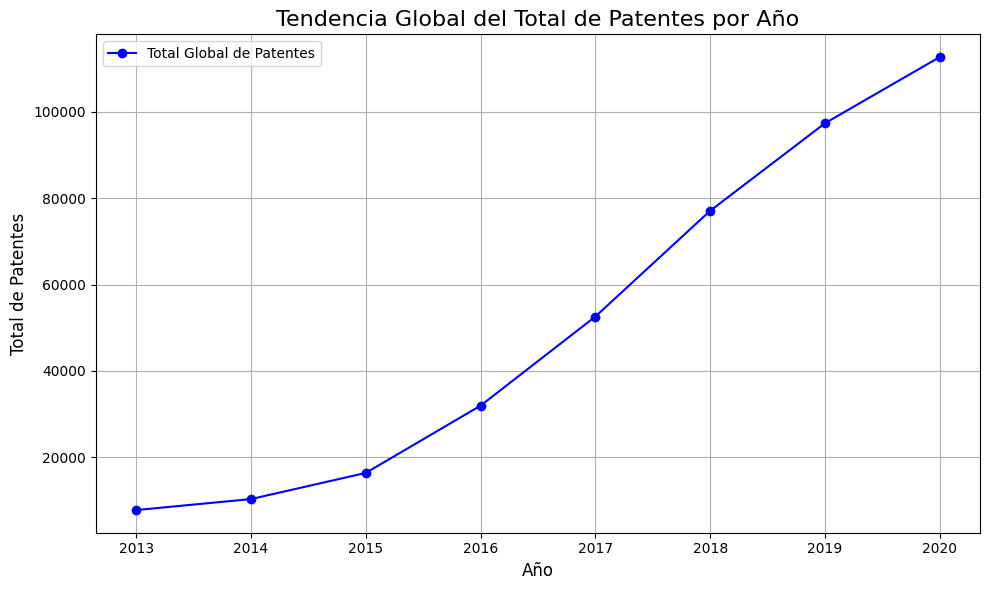


Top 5 países con más patentes totales:
Entity
World            202991
China             84608
United States     68757
South Korea       19245
Japan             13244
Name: Total Patents, dtype: int64


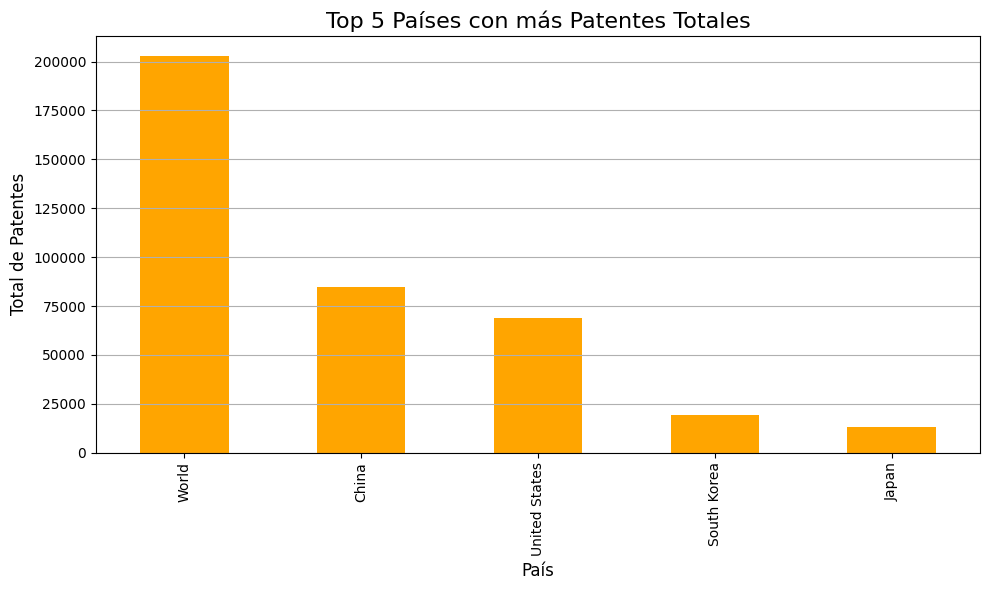

In [34]:
# Visualizar la tendencia global del total de patentes por año
global_patents_trend = patent_summary.groupby('Year')['Total Patents'].sum()

plt.figure(figsize=(10, 6))
plt.plot(global_patents_trend.index, global_patents_trend.values, marker='o', color='blue', label='Total Global de Patentes')
plt.title('Tendencia Global del Total de Patentes por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Patentes', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Identificar los 5 países con más patentes totales
country_patents = patent_summary.groupby('Entity')['Total Patents'].sum().sort_values(ascending=False).head(5)

print("\nTop 5 países con más patentes totales:")
print(country_patents)

# Visualizar la distribución por país
plt.figure(figsize=(10, 6))
country_patents.plot(kind='bar', color='orange')
plt.title('Top 5 Países con más Patentes Totales', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Total de Patentes', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Análisis de distribución de la industria

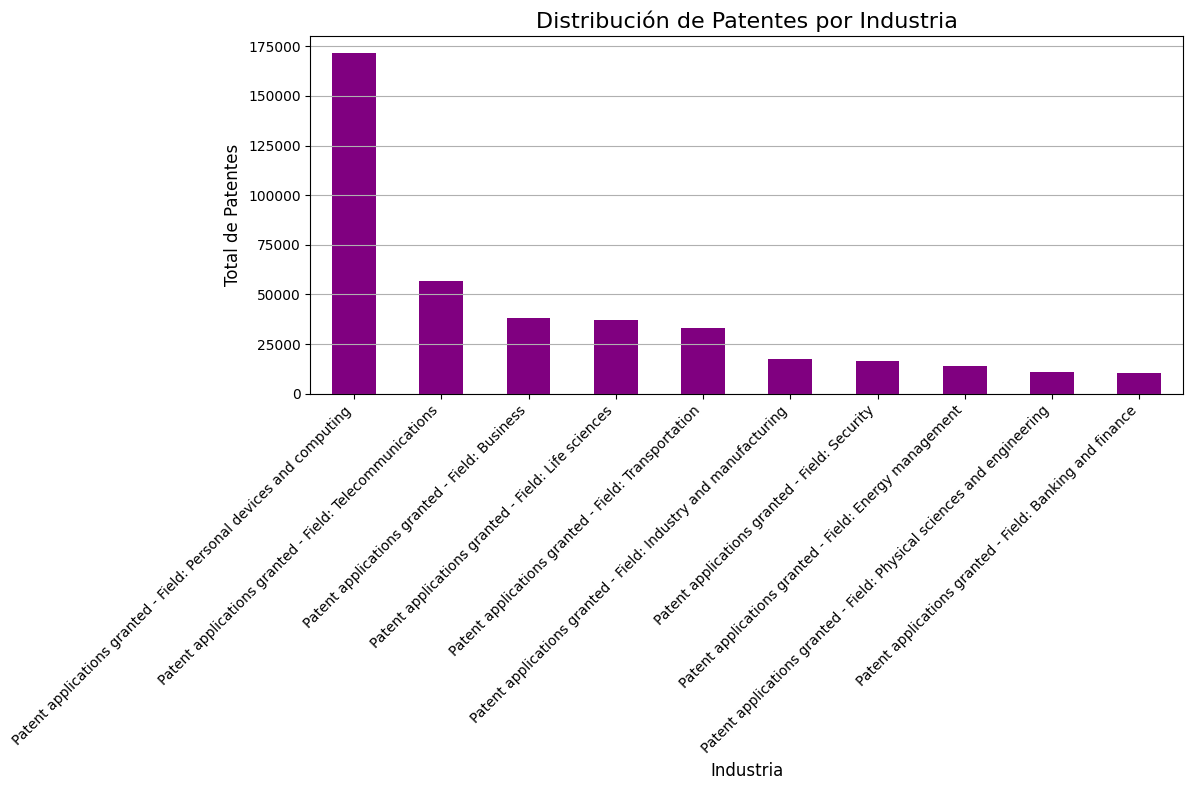


Top 5 países con más patentes en el campo de 'Banking and finance':
Entity
World            5122
United States    2324
China            1393
South Korea       512
Japan             313
Name: Patent applications granted - Field: Banking and finance, dtype: int64


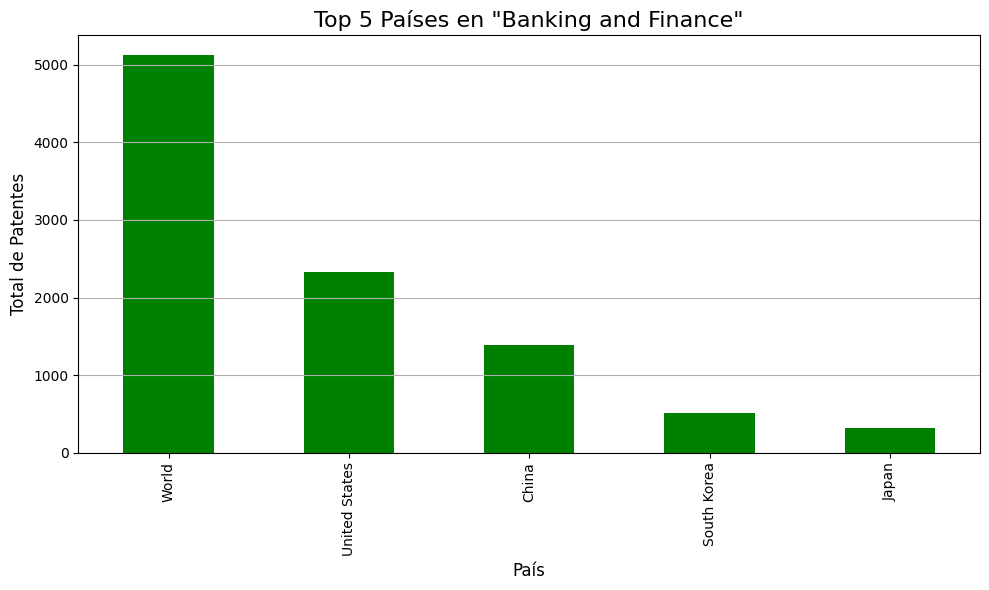

In [35]:
# Agrupar y sumar las patentes por campo industrial
industry_summary = patent_data[patent_columns].sum().sort_values(ascending=False)

# Visualizar la distribución de patentes por industria
plt.figure(figsize=(12, 8))
industry_summary.plot(kind='bar', color='purple')
plt.title('Distribución de Patentes por Industria', fontsize=16)
plt.xlabel('Industria', fontsize=12)
plt.ylabel('Total de Patentes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Análisis combinado: Top países en el campo de "Banking and finance"
banking_finance_data = patent_data.groupby('Entity')['Patent applications granted - Field: Banking and finance'].sum().sort_values(ascending=False).head(5)

print("\nTop 5 países con más patentes en el campo de 'Banking and finance':")
print(banking_finance_data)

# Visualizar el resultado para "Banking and finance"
plt.figure(figsize=(10, 6))
banking_finance_data.plot(kind='bar', color='green')
plt.title('Top 5 Países en "Banking and Finance"', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Total de Patentes', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
